In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
# Define the create_lstm_model function outside the loop
def create_lstm_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=50))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [3]:
# Load the Excel file
excel_file_path = '2020Q1Q2Q3Q4-2021Q1.xlsx'  # Replace with your file path
xls = pd.ExcelFile(excel_file_path)

# Get the sheet names
sheet_names = xls.sheet_names

# Create a dictionary to store DataFrames for each sheet
dataframes = {}

# Loop through each sheet and create a DataFrame
for sheet_name in sheet_names:
    dataframes[sheet_name] = xls.parse(sheet_name)

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 4ms/step
Analysis for Russia - Sberbank Rossii PAO (S
Ensemble RMSE: 4.990676450960864


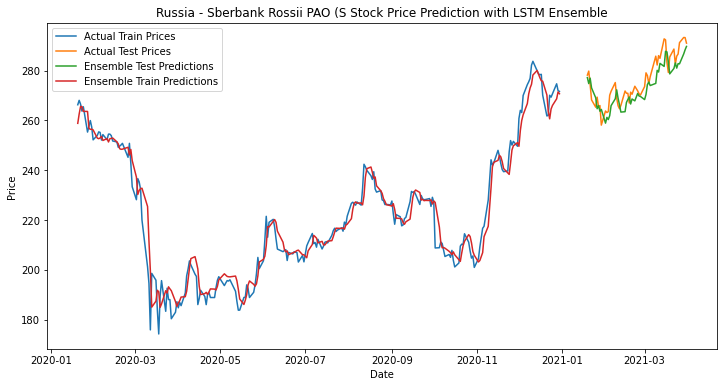

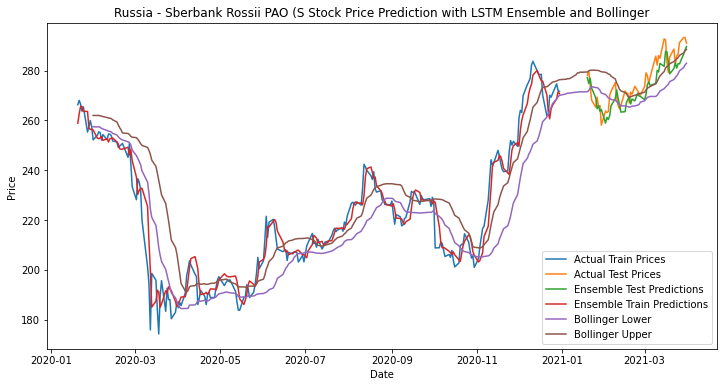

prediction_Russia - Sberbank Rossii PAO (S_df:
         Date  Actual Price  Predicted Price       Upper       Lower Recommendation
0  2021-01-19        278.19       277.187424  279.411412  271.498588           HOLD
1  2021-01-20        279.80       274.777504  279.870390  272.003610           HOLD
2  2021-01-21        274.40       276.968216  280.140263  272.994737           HOLD
3  2021-01-22        268.25       273.052937  280.175361  273.580639            BUY
4  2021-01-25        265.30       269.063618  280.104519  273.171481            BUY
5  2021-01-26        269.34       264.694824  280.104965  273.173035            BUY
6  2021-01-27        265.50       265.890797  280.008927  272.755073            BUY
7  2021-01-28        265.96       263.698120  279.752401  272.137599            BUY
8  2021-01-29        258.11       264.416847  279.534185  270.966815            BUY
9  2021-02-01        263.80       258.910034  279.314908  270.401092            BUY
10 2021-02-02        263.15  

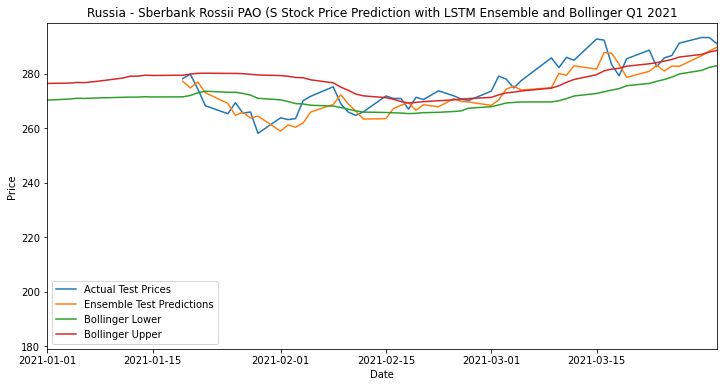

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 4ms/step
Analysis for Turkey - Koc Holding AS (KCHOL)
Ensemble RMSE: 0.690505946269883


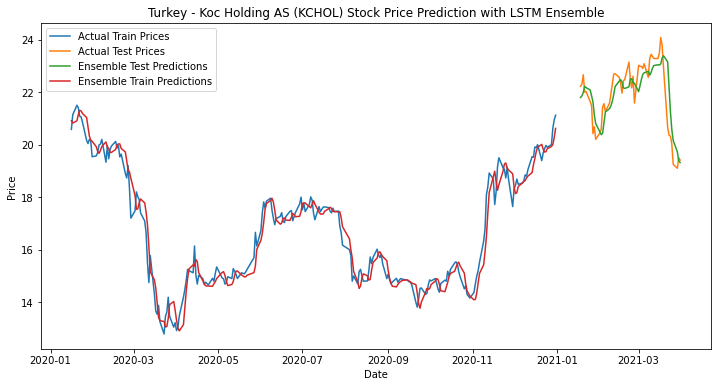

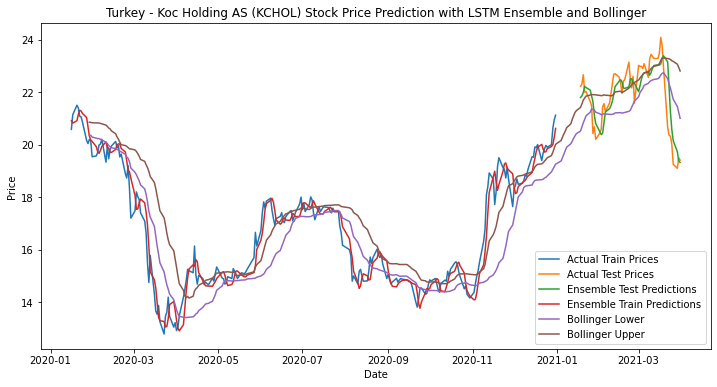

prediction_Turkey - Koc Holding AS (KCHOL)_df:
         Date  Actual Price  Predicted Price      Upper      Lower Recommendation
0  2021-01-18         22.22        21.794156  21.416863  20.515137           SELL
1  2021-01-19         22.30        21.853877  21.545597  20.677403           SELL
2  2021-01-20         22.66        21.981458  21.693149  20.827851           SELL
3  2021-01-21         22.00        22.221548  21.774408  20.962592           SELL
4  2021-01-22         22.02        22.173142  21.847626  21.094374           SELL
5  2021-01-25         21.64        22.078016  21.886263  21.229737           SELL
6  2021-01-26         21.48        21.856971  21.904868  21.359132           HOLD
7  2021-01-27         20.42        21.631222  21.905343  21.338657           HOLD
8  2021-01-28         20.68        21.123888  21.901907  21.316093            BUY
9  2021-01-29         20.20        20.800945  21.891958  21.234042            BUY
10 2021-02-01         20.44        20.484671  21.87

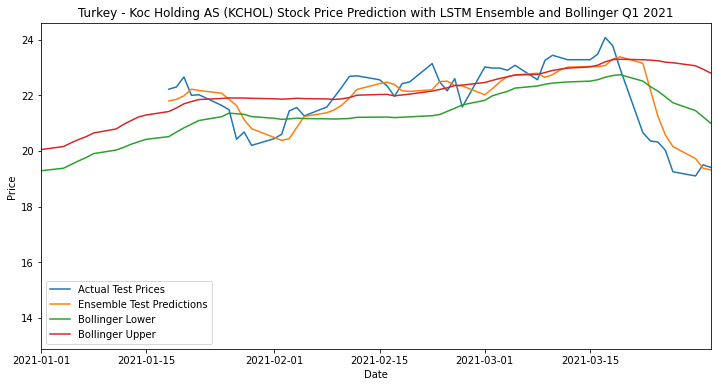

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 4ms/step
Analysis for Egypt - Medinet Nasr Housing (M
Ensemble RMSE: 0.10343107705346982


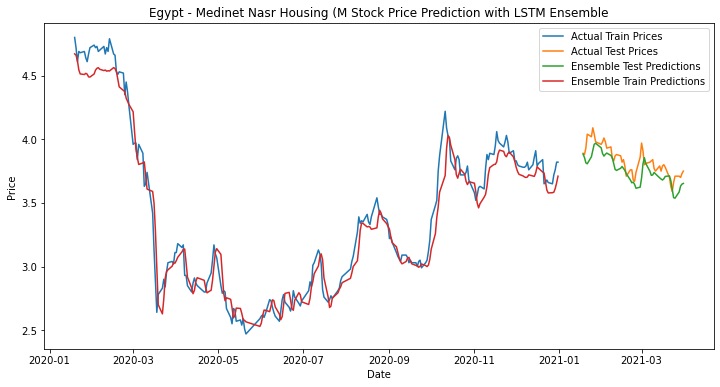

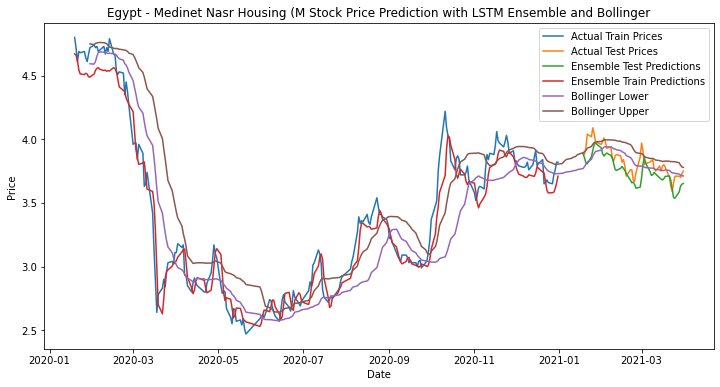

prediction_Egypt - Medinet Nasr Housing (M_df:
         Date  Actual Price  Predicted Price     Upper     Lower Recommendation
0  2021-01-18          3.89         3.883746  3.893997  3.770003           HOLD
1  2021-01-19          3.88         3.857126  3.901838  3.785162           HOLD
2  2021-01-20          3.93         3.814996  3.911871  3.802129           HOLD
3  2021-01-21          4.04         3.807192  3.929350  3.820650            BUY
4  2021-01-24          4.02         3.863045  3.943370  3.842630           HOLD
5  2021-01-25          4.09         3.913477  3.961297  3.868703           HOLD
6  2021-01-26          4.04         3.960795  3.973206  3.888794           HOLD
7  2021-01-27          3.98         3.968717  3.979367  3.904633           HOLD
8  2021-01-31          3.96         3.932767  3.983523  3.914477           HOLD
9  2021-02-01          3.98         3.887371  3.988124  3.925876            BUY
10 2021-02-02          4.01         3.867743  3.993787  3.938213         

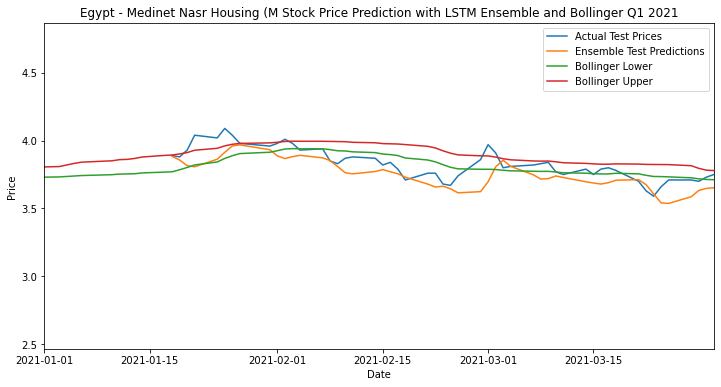

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 5ms/step
Analysis for Brazil - Minerva SABrazil (BEEF
Ensemble RMSE: 0.26641607239027065


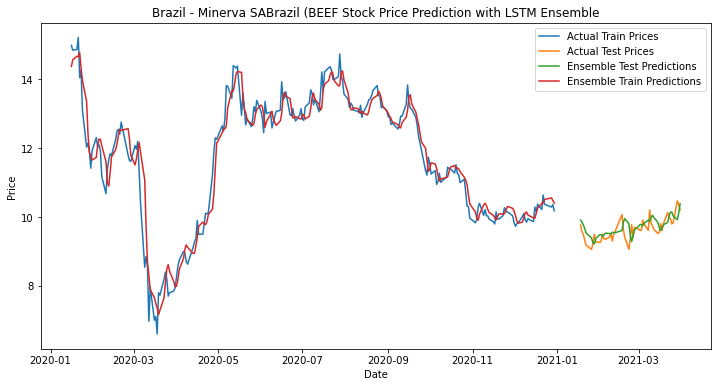

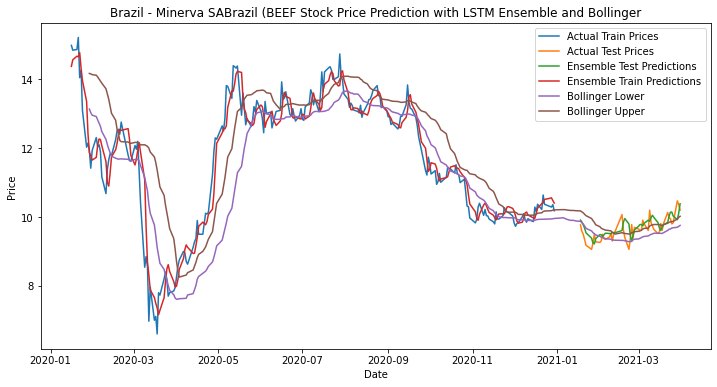

prediction_Brazil - Minerva SABrazil (BEEF_df:
         Date  Actual Price  Predicted Price      Upper     Lower Recommendation
0  2021-01-18          9.77         9.910604  10.178641  9.875359           HOLD
1  2021-01-19          9.58         9.854366  10.147648  9.835352           HOLD
2  2021-01-20          9.50         9.774482  10.122514  9.794486            BUY
3  2021-01-21          9.34         9.669268  10.077318  9.736682            BUY
4  2021-01-22          9.18         9.537659  10.039287  9.670713            BUY
5  2021-01-26          9.06         9.386551   9.956353  9.595647            BUY
6  2021-01-27          9.24         9.244929   9.895070  9.543930            BUY
7  2021-01-28          9.50         9.217408   9.843603  9.516397            BUY
8  2021-01-29          9.28         9.372851   9.774390  9.477610            BUY
9  2021-02-01          9.26         9.488506   9.718517  9.441483           HOLD
10 2021-02-02          9.31         9.483067   9.673927  9.413

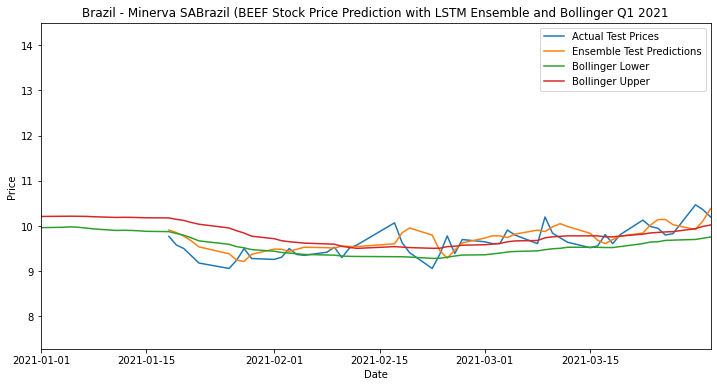

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 4ms/step
Analysis for Argentina - Pampa Energia SA (P
Ensemble RMSE: 3.2726885502813734


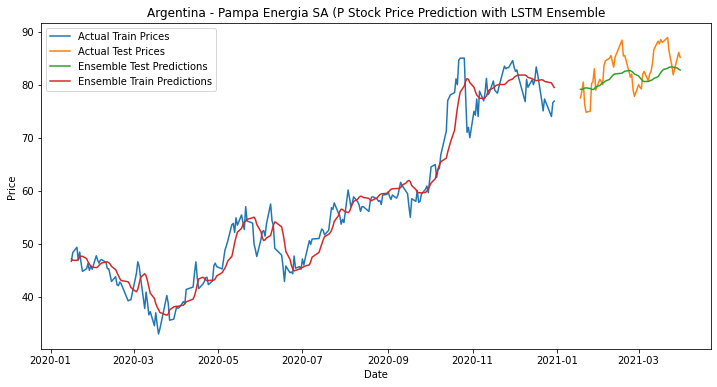

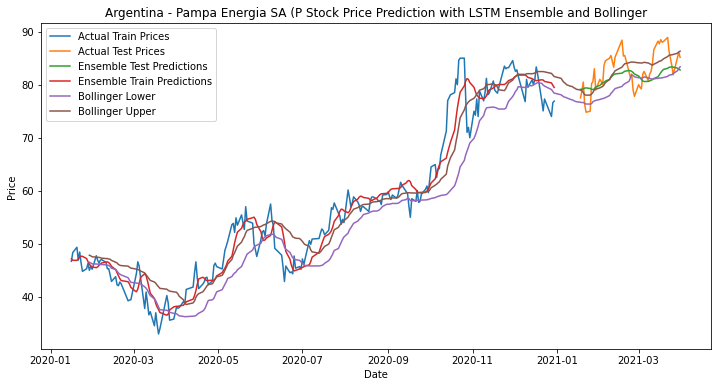

prediction_Argentina - Pampa Energia SA (P_df:
         Date  Actual Price  Predicted Price      Upper      Lower Recommendation
0  2021-01-18         77.50        79.123229  78.989154  76.685846           SELL
1  2021-01-19         78.80        79.136261  78.824640  76.630360           SELL
2  2021-01-20         80.50        79.184036  78.524978  76.645022           SELL
3  2021-01-21         76.30        79.352863  78.092107  76.507893           SELL
4  2021-01-22         74.80        79.395626  78.029823  76.350177           SELL
5  2021-01-25         75.00        79.289241  78.029016  76.345984           SELL
6  2021-01-26         80.20        79.115396  78.239065  76.425935           SELL
7  2021-01-27         80.60        79.080477  78.549944  76.775056           SELL
8  2021-01-28         83.00        79.212453  79.041089  76.923911           SELL
9  2021-01-29         79.00        79.571695  79.143868  77.031132           SELL
10 2021-02-01         81.00        79.863338  79.39

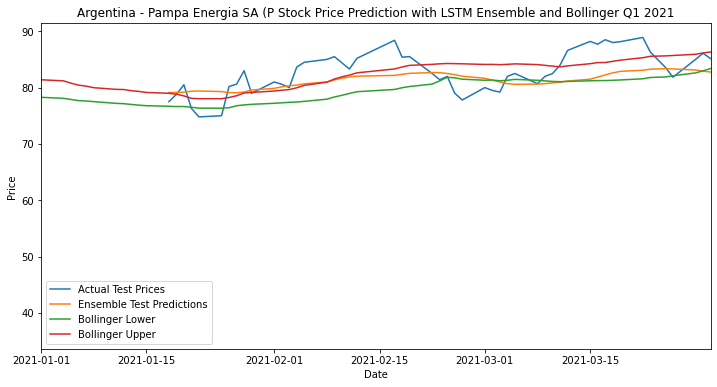

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 5ms/step
Analysis for Colombia - Cementos Argos SA (C
Ensemble RMSE: 170.74166363671634


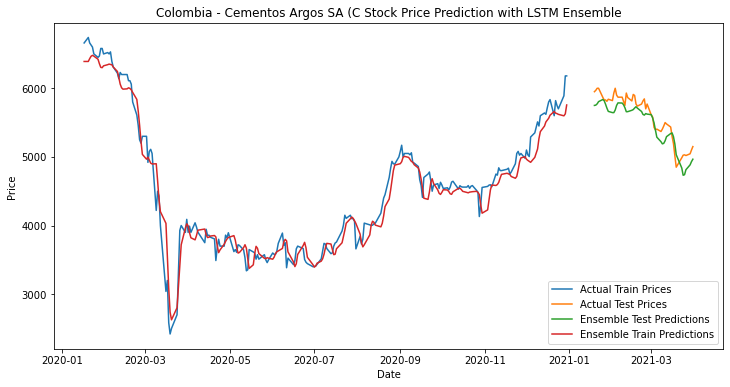

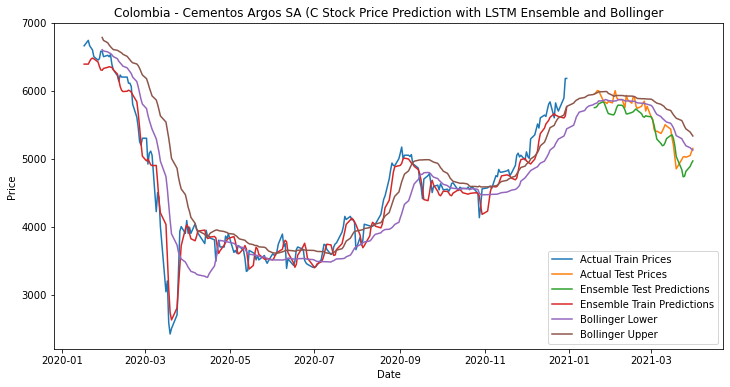

prediction_Colombia - Cementos Argos SA (C_df:
         Date  Actual Price  Predicted Price        Upper        Lower Recommendation
0  2021-01-19        5950.0      5749.867554  5952.034364  5804.965636            BUY
1  2021-01-20        5970.0      5754.254883  5960.602775  5813.397225            BUY
2  2021-01-21        6000.0      5773.182495  5969.626686  5820.873314            BUY
3  2021-01-22        6000.0      5805.170654  5981.763132  5848.736868            BUY
4  2021-01-25        5870.0      5835.599121  5983.552111  5851.947889            BUY
5  2021-01-26        5830.0      5820.451538  5985.442699  5858.057301            BUY
6  2021-01-27        5830.0      5769.100830  5987.490117  5869.009883            BUY
7  2021-01-28        5810.0      5711.122192  5984.829846  5863.670154            BUY
8  2021-01-29        5840.0      5663.142212  5960.416045  5854.083955            BUY
9  2021-02-01        5820.0      5645.165649  5932.408787  5846.091213            BUY
10 2021

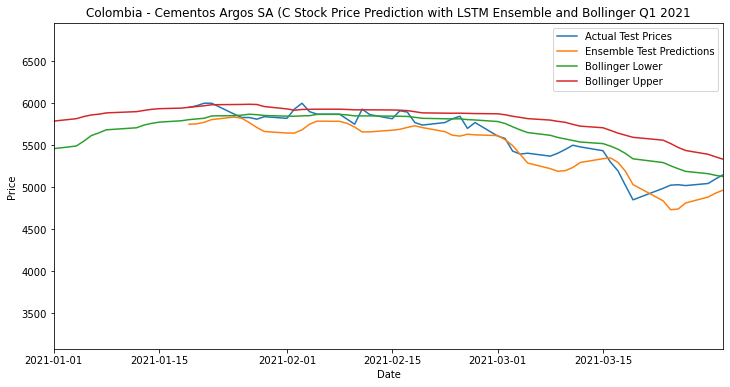

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


8/8 [==============================] - 0s 4ms/step
Analysis for South Africa - Impala Platinum 
Ensemble RMSE: 1124.7328337422161


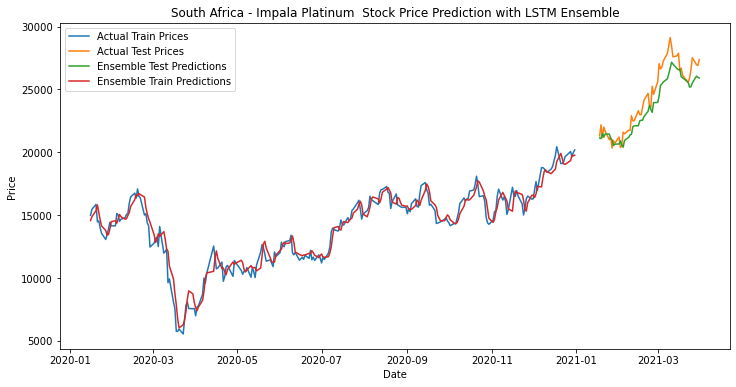

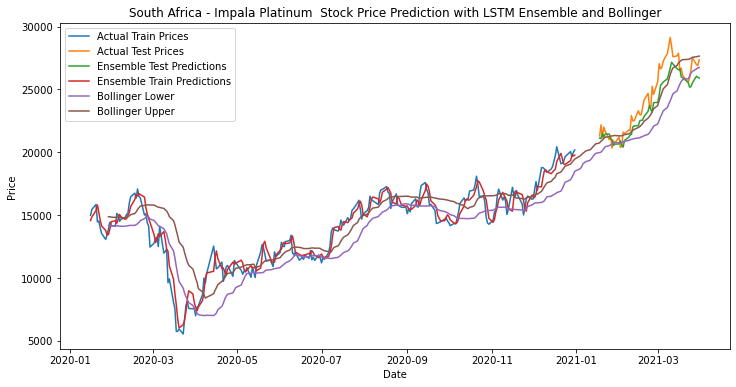

prediction_South Africa - Impala Platinum _df:
         Date  Actual Price  Predicted Price         Upper         Lower Recommendation
0  2021-01-18       21306.0     21136.235840  20752.518817  19980.781183           SELL
1  2021-01-19       22186.0     21090.059082  20889.917919  20017.282081           SELL
2  2021-01-20       21161.0     21511.287598  20969.030574  20144.369426           SELL
3  2021-01-21       22009.0     21212.236572  21107.493987  20295.106013           SELL
4  2021-01-22       21690.0     21455.236328  21205.732714  20439.867286           SELL
5  2021-01-25       21005.0     21451.046387  21248.017890  20533.582110           SELL
6  2021-01-26       21200.0     21083.314697  21292.591091  20602.608909           HOLD
7  2021-01-27       20336.0     20990.528564  21300.453305  20663.346695           HOLD
8  2021-01-28       20934.0     20544.155762  21325.704996  20732.495004            BUY
9  2021-01-29       20718.0     20650.212402  21337.989380  20773.010620 

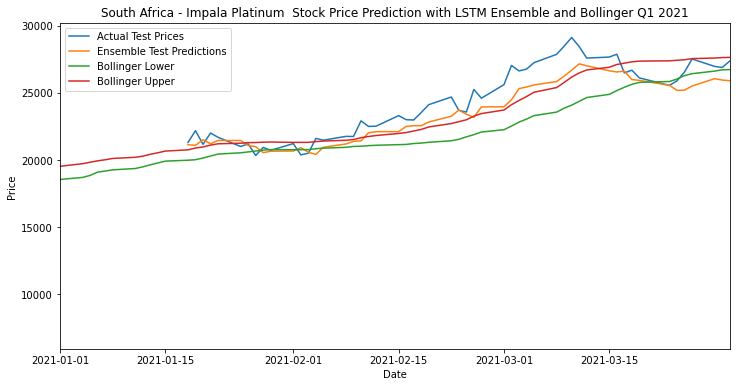

<ipython-input-8-a87af19d900d>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)


9/9 [==============================] - 0s 4ms/step
Analysis for South Korea - Dongkuk Steel Mil
Ensemble RMSE: 1077.3947853480872


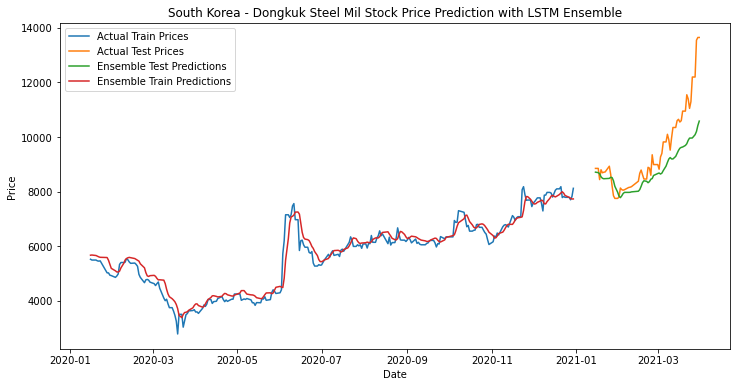

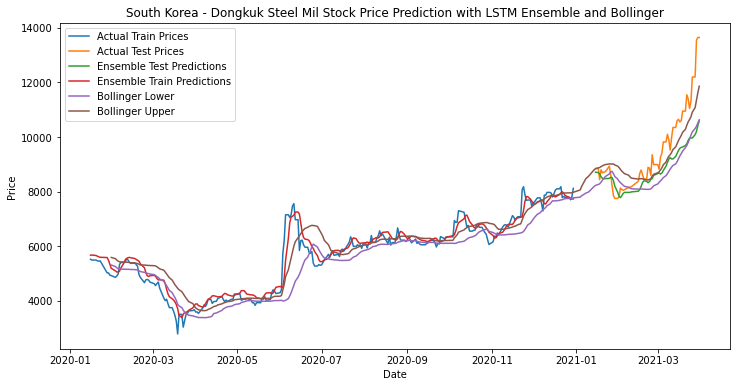

prediction_South Korea - Dongkuk Steel Mil_df:
         Date  Actual Price  Predicted Price         Upper         Lower Recommendation
0  2021-01-15        8850.0      8712.313232   8834.902918   8225.097082           HOLD
1  2021-01-17        8850.0      8694.336670   8870.006525   8264.993475           HOLD
2  2021-01-18        8440.0      8653.199219   8880.006063   8280.993937           HOLD
3  2021-01-19        8800.0      8543.259399   8916.494344   8346.505656           HOLD
4  2021-01-20        8690.0      8488.610718   8943.521782   8406.478218           HOLD
5  2021-01-21        8710.0      8470.853882   8968.502791   8473.497209            BUY
6  2021-01-22        8720.0      8474.586060   8989.499733   8545.500267            BUY
7  2021-01-25        8930.0      8483.024902   9012.417126   8645.582874            BUY
8  2021-01-26        8630.0      8523.443970   9012.102456   8726.897544            BUY
9  2021-01-27        8210.0      8513.612549   9010.607390   8737.392610 

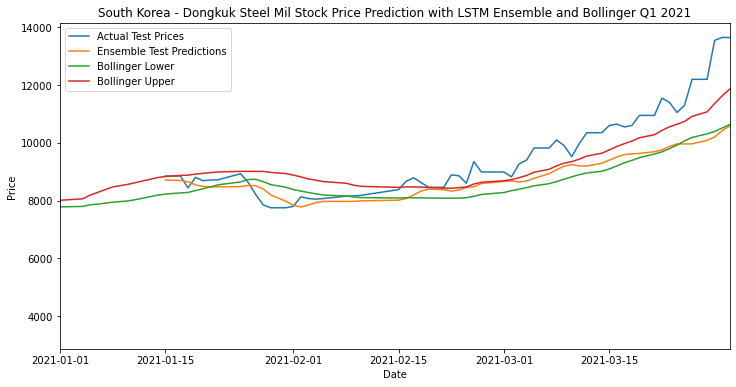

In [8]:
pd.set_option('display.width', 1000)

for sheet_name, df in dataframes.items():
    df = df[['Date', 'Price']]
    df = df.drop(df.tail(1).index)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Price'] = df['Price'].astype(float)
    df.sort_values(by='Date', ascending=True, inplace=True)
    df.set_index('Date', inplace=True)
    
    split_date = '2021-01-01'
    train_data = df.loc[:split_date]
    test_data = df.loc[split_date:]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    seq_length = 10
    X_train, y_train = [], []
    for i in range(seq_length, len(train_scaled)):
        X_train.append(train_scaled[i-seq_length:i])
        y_train.append(train_scaled[i])
    
    X_test, y_test = [], []
    for i in range(seq_length, len(test_scaled)):
        X_test.append(test_scaled[i-seq_length:i])
        y_test.append(test_scaled[i])
        
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    param_grid = {'learning_rate': [0.001, 0.01, 0.1],
              'dropout_rate': [0.2, 0.4, 0.6]}
    model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_result.best_params_
    learning_rate = best_params['learning_rate']
    dropout_rate = best_params['dropout_rate']
    
    # Ensemble model
    num_models = 5  # Number of models in the ensemble
    ensemble_predictions = np.zeros_like(y_test).reshape(-1)
    ensemble_train_predictions = np.zeros_like(y_train).reshape(-1)
    
    for i in range(num_models):
        model = create_lstm_model(learning_rate=learning_rate, dropout_rate=dropout_rate)
        early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)
        predictions = model.predict(X_test)
        train_predictions = model.predict(X_train)
        ensemble_predictions += scaler.inverse_transform(predictions).flatten() / num_models
        ensemble_train_predictions += scaler.inverse_transform(train_predictions).flatten() / num_models
    
    ensemble_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), ensemble_predictions))
    
    print(f"Analysis for {sheet_name}")
    
    print('Ensemble RMSE:', ensemble_rmse)
    
    # Convert train_data and test_data to DataFrames
    train_data_df = pd.DataFrame(train_data[seq_length:].values, columns=['Actual Train Prices'], index=train_data.index[seq_length:])
    test_data_df = pd.DataFrame(test_data[seq_length:].values, columns=['Actual Test Prices'], index=test_data.index[seq_length:])
    
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data_df.index, train_data_df['Actual Train Prices'], label='Actual Train Prices')
    plt.plot(test_data_df.index, test_data_df['Actual Test Prices'], label='Actual Test Prices')
    plt.plot(test_data_df.index, ensemble_predictions, label='Ensemble Test Predictions')
    plt.plot(train_data_df.index, ensemble_train_predictions, label='Ensemble Train Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f"{sheet_name} Stock Price Prediction with LSTM Ensemble")
    plt.legend()
    plt.show()
    
    df_bollinger = df.copy()
    df_bollinger = df_bollinger.reset_index()
    
    # Calculate Bollinger Bands on predicted prices
    sma = df_bollinger['Price'].rolling(window=20).mean()
    rstd = df_bollinger['Price'].rolling(window=20).std()
    
    upper_band = sma + 0.5 * rstd
    lower_band = sma - 0.5 * rstd
    
    df_bollinger['Upper'] = upper_band
    df_bollinger['Lower'] = lower_band
    
    dates_bollinger = df_bollinger['Date']
    
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data_df.index, train_data_df['Actual Train Prices'], label='Actual Train Prices')
    plt.plot(test_data_df.index, test_data_df['Actual Test Prices'], label='Actual Test Prices')
    plt.plot(test_data_df.index, ensemble_predictions, label='Ensemble Test Predictions')
    plt.plot(train_data_df.index, ensemble_train_predictions, label='Ensemble Train Predictions')
    plt.plot(dates_bollinger, lower_band, label= 'Bollinger Lower')
    plt.plot(dates_bollinger, upper_band, label= 'Bollinger Upper')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f"{sheet_name} Stock Price Prediction with LSTM Ensemble and Bollinger")
    plt.legend()
    plt.show()
    
    prediction_df = test_data_df.copy()
    prediction_df.rename(columns = {'Actual Test Prices':'Actual Price'}, inplace = True)
    prediction_df['Predicted Price'] = ensemble_predictions
    prediction_df.reset_index(inplace=True)
    prediction_df = prediction_df.merge(df_bollinger[['Date', 'Upper', 'Lower']], on='Date', how='inner',)
    
    # Add a new column 'Recommendation' based on conditions
    prediction_df['Recommendation'] = 'HOLD'  # Default recommendation
    
    # Update the recommendation based on conditions
    prediction_df.loc[prediction_df['Predicted Price'] < prediction_df['Lower'], 'Recommendation'] = 'BUY'
    prediction_df.loc[prediction_df['Predicted Price'] > prediction_df['Upper'], 'Recommendation'] = 'SELL'
    
    # Display the final prediction DataFrame
    prediction_df_name = f'prediction_{sheet_name}_df'
    globals()[prediction_df_name] = prediction_df

    print(f"{prediction_df_name}:\n{prediction_df}\n")

    
    start_date = pd.to_datetime('2021-01-01')
    end_date = pd.to_datetime('2021-03-31')
    
    plt.figure(figsize=(12, 6))
    plt.plot(test_data_df.index, test_data_df['Actual Test Prices'], label='Actual Test Prices')
    plt.plot(test_data_df.index, ensemble_predictions, label='Ensemble Test Predictions')
    plt.plot(dates_bollinger, lower_band, label= 'Bollinger Lower')
    plt.plot(dates_bollinger, upper_band, label= 'Bollinger Upper')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f"{sheet_name} Stock Price Prediction with LSTM Ensemble and Bollinger Q1 2021")
    plt.xlim(start_date, end_date)
    plt.legend()
    plt.show()
